# Results of VAE-Kernel-DM approach

In [1]:
# Load data
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

from dm_class import dmMethod

In [2]:
solar_forcing = Dataset("data/Solar_forcing_1st_mill.nc", "r")  # 999 x 1 x 1
T2m_r1 = Dataset("data/T2m_R1_ym_1stMill.nc", "r")  # 999 x 192 x 96
T2m_r2 = Dataset("data/T2m_R2_ym_1stMill.nc", "r")  # 999 x 192 x 96
Volc = Dataset("data/Volc_Forc_AOD_1st_mill.nc", "r")  # 999 x 1 x 1,,

# Numpy version
T2m_r1_np = np.asarray(T2m_r1.variables["T2m"][:])
T2m_r2_np = np.asarray(T2m_r1.variables["T2m"][:])
volc_activity_np = Volc.variables["AOD"][:].flatten()
solar_forcing_np = solar_forcing.variables["TSI"][:].flatten()

# Solar long cycle 
solar_forcing_sm = savgol_filter(solar_forcing_np, 19, 3)

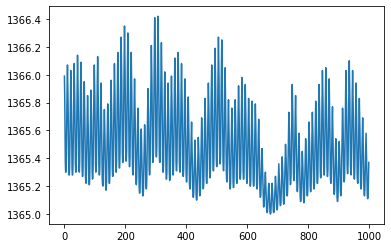

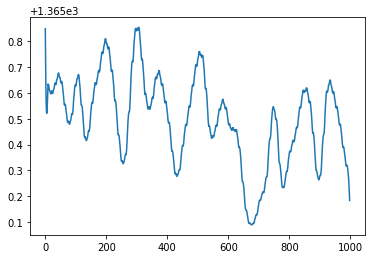

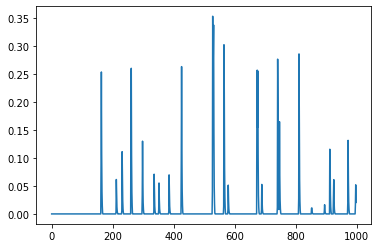

In [3]:
# Plot the ground-truth
plt.plot(solar_forcing_np[:])
plt.show()
plt.plot(solar_forcing_sm[:])
plt.show()
plt.plot(volc_activity_np[:])
plt.show()

In [4]:
def plot_results(file, n_comps, return_model = None, time_lengh = 900):
    # import the results of AE
    ae_output = np.load(file).reshape(time_lengh, -1)
    
    # Perform DM (we are interested in 2 components)
    dm = dmMethod(ae_output, n_components=n_comps)
    print("############################")
    print("OUTPUTING RESULTS OF PCA")
    print("############################")
    dm.perform_pca()
    if return_model == "pca":
        model = dm
        
    # Make some comparsions
    for i in range(n_comps):
        plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
        plt.plot(dmMethod.standardize_data(volc_activity_np[:]))
        plt.show()
        print("correlation between volcanic activity and component {} at time lag = 0 is {}".format(i, 
            np.corrcoef(volc_activity_np[:time_lengh], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    
    # Make some comparsions
    for i in range(3):
        plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
        plt.plot(dmMethod.standardize_data(solar_forcing_sm[:]))
        plt.show()
        print("correlation between solar radiation and component {} at time lag = 0 is {}". format(i, 
              np.corrcoef(solar_forcing_sm[:time_lengh], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    
    print("############################")
    print("OUTPUTING RESULTS OF Varimax")
    print("############################")

    dm.perfrom_varimax()
    if return_model == "varimax":
        model = dm
        
    # Make some comparsions
    for i in range(n_comps):
        plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
        plt.plot(dmMethod.standardize_data(volc_activity_np[:]))
        plt.show()
        print("correlation between volcanic activity and component {} at time lag = 0 is {}".format(i, 
            np.corrcoef(volc_activity_np[:time_lengh], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    
    # Make some comparsions
    for i in range(3):
        plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
        plt.plot(dmMethod.standardize_data(solar_forcing_sm[:]))
        plt.show()
        print("correlation between solar radiation and component {} at time lag = 0 is {}". format(i, 
              np.corrcoef(solar_forcing_sm[:time_lengh], savgol_filter(dm.components[i, :], 19, 3))[0,1]))

        
    print("############################")
    print("OUTPUTING RESULTS OF FastICSA")
    print("############################")

    dm.perform_fastICA()
    dm.components = dm.components.transpose()
    if return_model == "FastICA":
        model = dm

    # Make some comparsions
    for i in range(n_comps):
        plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
        plt.plot(dmMethod.standardize_data(volc_activity_np[:]))
        plt.show()
        print("correlation between volcanic activity and component {} at time lag = 0 is {}".format(i, 
            np.corrcoef(volc_activity_np[:time_lengh], savgol_filter(dm.components[i, :], 19, 3))[0,1]))

    # Make some comparsions
    for i in range(3):
        plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
        plt.plot(dmMethod.standardize_data(solar_forcing_sm[:]))
        plt.show()
        print("correlation between solar radiation and component {} at time lag = 0 is {}". format(i, 
              np.corrcoef(solar_forcing_sm[:time_lengh], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    

############################
OUTPUTING RESULTS OF PCA
############################


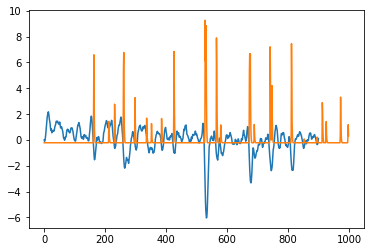

correlation between volcanic activity and component 0 at time lag = 0 is -0.4658465140407559


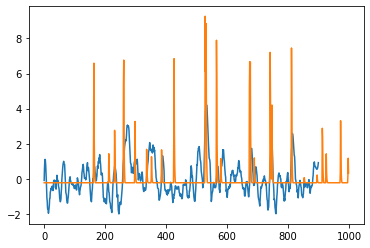

correlation between volcanic activity and component 1 at time lag = 0 is 0.26608111100095694


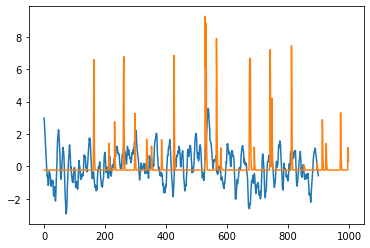

correlation between volcanic activity and component 2 at time lag = 0 is 0.017162385440875276


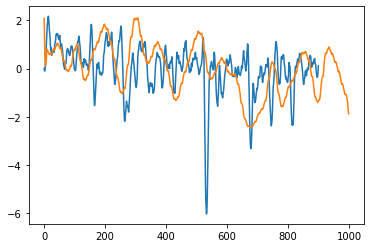

correlation between solar radiation and component 0 at time lag = 0 is 0.24071432859629865


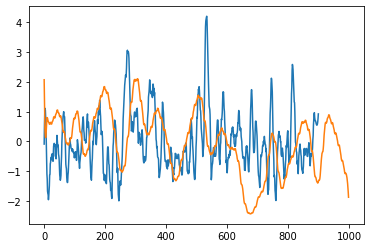

correlation between solar radiation and component 1 at time lag = 0 is 0.08459728633092153


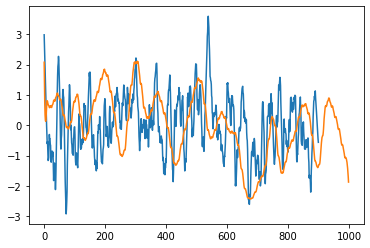

correlation between solar radiation and component 2 at time lag = 0 is 0.15209280665240682
############################
OUTPUTING RESULTS OF Varimax
############################
Get Varimax components
	 Get SVD
	 User-selected number of components: 3
	 Explaining 1.00 of variance
	 Varimax rotation
	 Further metrics


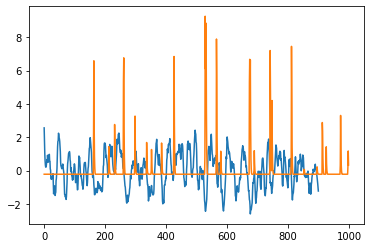

correlation between volcanic activity and component 0 at time lag = 0 is -0.20462759564805771


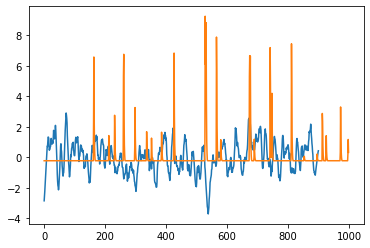

correlation between volcanic activity and component 1 at time lag = 0 is -0.04826816271252422


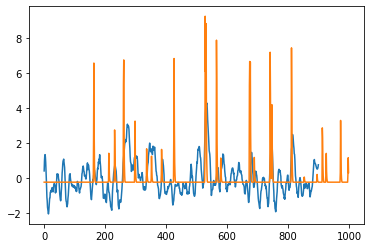

correlation between volcanic activity and component 2 at time lag = 0 is 0.25286690800637074


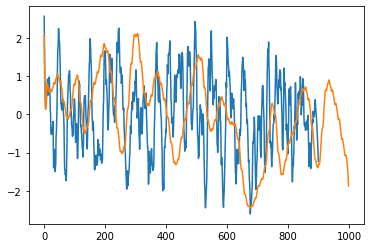

correlation between solar radiation and component 0 at time lag = 0 is 0.057829535232585424


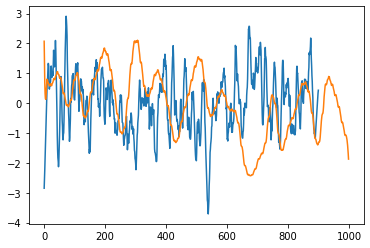

correlation between solar radiation and component 1 at time lag = 0 is -0.1559845277753827


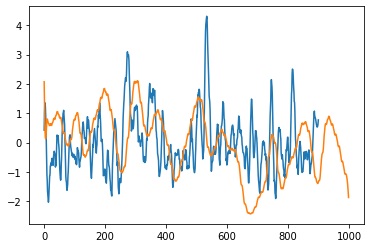

correlation between solar radiation and component 2 at time lag = 0 is 0.10573042769286314
############################
OUTPUTING RESULTS OF FastICSA
############################


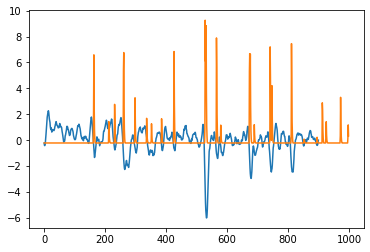

correlation between volcanic activity and component 0 at time lag = 0 is -0.4447153038141449


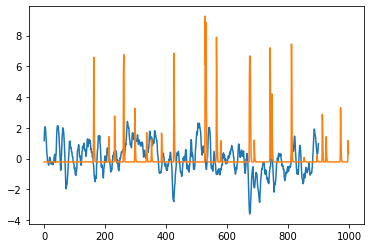

correlation between volcanic activity and component 1 at time lag = 0 is -0.1700554735773528


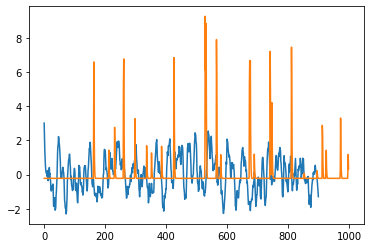

correlation between volcanic activity and component 2 at time lag = 0 is -0.06388508204206747


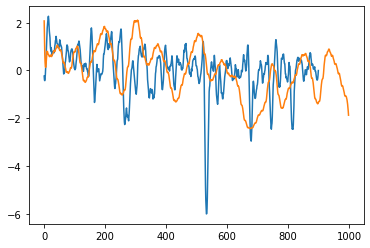

correlation between solar radiation and component 0 at time lag = 0 is 0.1803309273656364


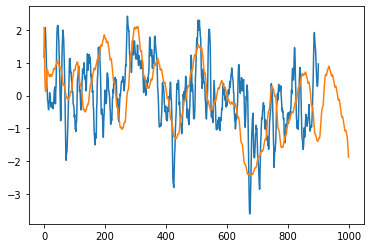

correlation between solar radiation and component 1 at time lag = 0 is 0.4186983047648325


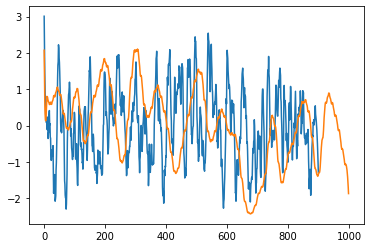

correlation between solar radiation and component 2 at time lag = 0 is 0.02203987444376439


In [6]:
plot_results("data/outputs_32.npy", 3)

############################
OUTPUTING RESULTS OF PCA
############################


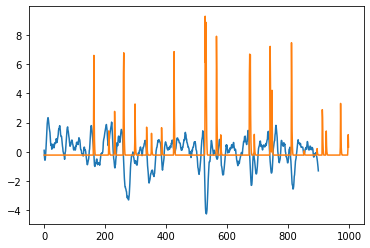

correlation between volcanic activity and component 0 at time lag = 0 is -0.2828907683482511


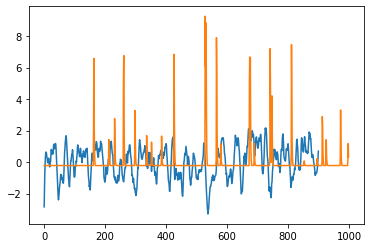

correlation between volcanic activity and component 1 at time lag = 0 is -0.07974477260405664


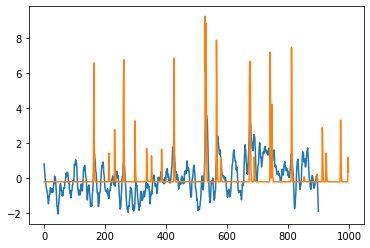

correlation between volcanic activity and component 2 at time lag = 0 is 0.33324569593843717


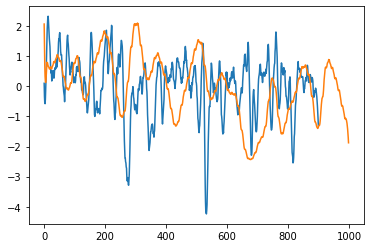

correlation between solar radiation and component 0 at time lag = 0 is 0.0406607282130533


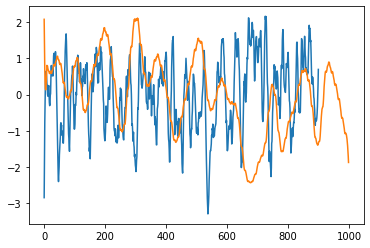

correlation between solar radiation and component 1 at time lag = 0 is -0.1601894614423185


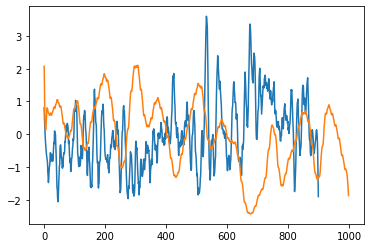

correlation between solar radiation and component 2 at time lag = 0 is -0.44425534865339317
############################
OUTPUTING RESULTS OF Varimax
############################
Get Varimax components
	 Get SVD
	 User-selected number of components: 3
	 Explaining 0.32 of variance
	 Varimax rotation
	 Further metrics


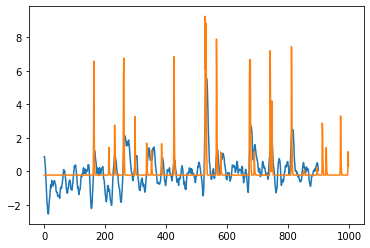

correlation between volcanic activity and component 0 at time lag = 0 is 0.40679414344203246


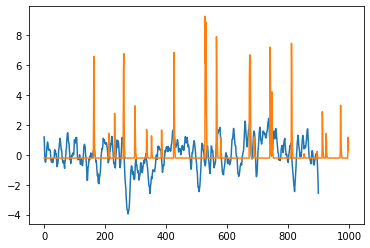

correlation between volcanic activity and component 1 at time lag = 0 is 0.07587966016061919


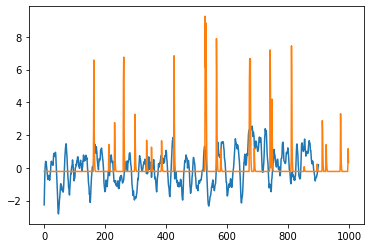

correlation between volcanic activity and component 2 at time lag = 0 is 0.07105372408975226


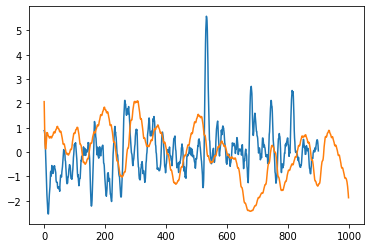

correlation between solar radiation and component 0 at time lag = 0 is -0.20636894895760138


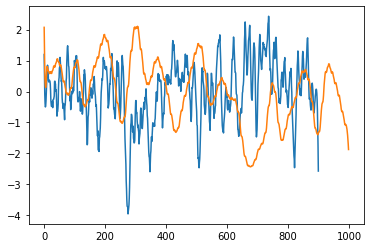

correlation between solar radiation and component 1 at time lag = 0 is -0.29821663468024934


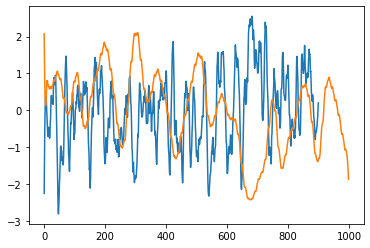

correlation between solar radiation and component 2 at time lag = 0 is -0.28269166241304833
############################
OUTPUTING RESULTS OF FastICSA
############################


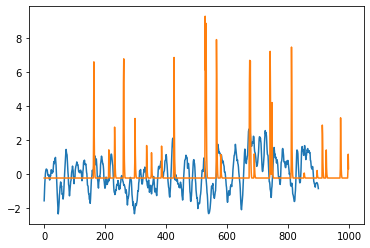

correlation between volcanic activity and component 0 at time lag = 0 is 0.04501619310633734


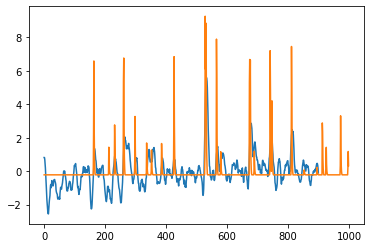

correlation between volcanic activity and component 1 at time lag = 0 is 0.4167950643474557


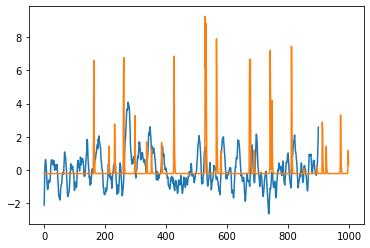

correlation between volcanic activity and component 2 at time lag = 0 is -0.022182774184914524


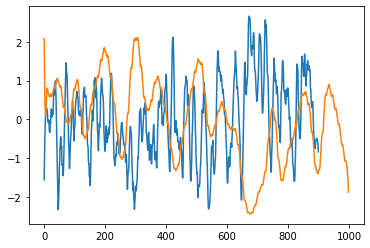

correlation between solar radiation and component 0 at time lag = 0 is -0.3328637759304005


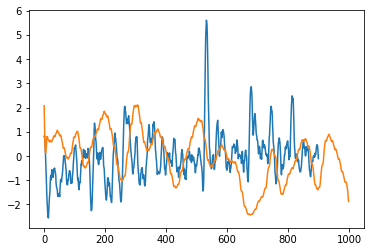

correlation between solar radiation and component 1 at time lag = 0 is -0.2443489321345178


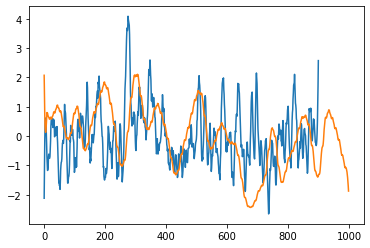

correlation between solar radiation and component 2 at time lag = 0 is 0.15277178422790846


In [7]:
plot_results("data/outputs_diff_32.npy", 3)

############################
OUTPUTING RESULTS OF PCA
############################


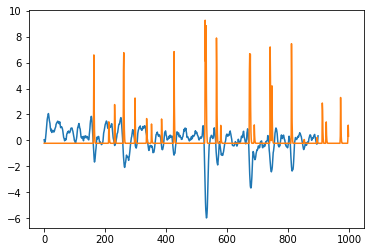

correlation between volcanic activity and component 0 at time lag = 0 is -0.4812924980450662


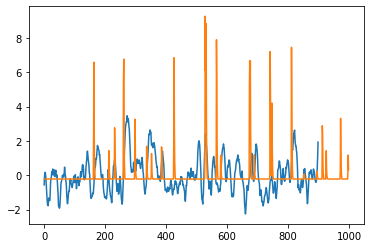

correlation between volcanic activity and component 1 at time lag = 0 is 0.09366787264986354


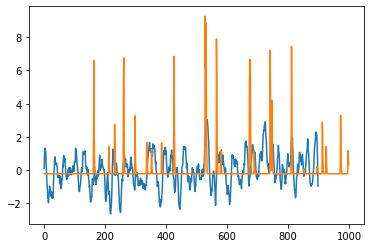

correlation between volcanic activity and component 2 at time lag = 0 is 0.14544399869282712


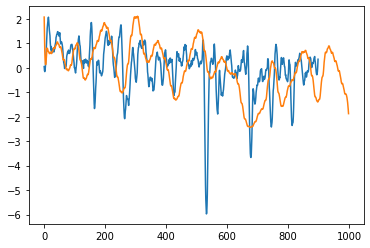

correlation between solar radiation and component 0 at time lag = 0 is 0.2737503227827572


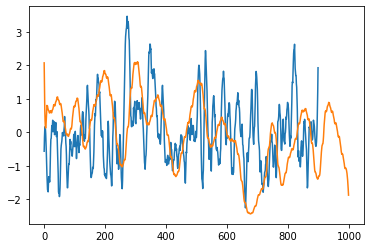

correlation between solar radiation and component 1 at time lag = 0 is 0.10948376736210158


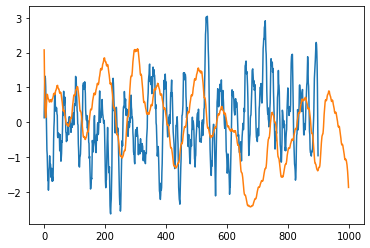

correlation between solar radiation and component 2 at time lag = 0 is -0.21684659878191487
############################
OUTPUTING RESULTS OF Varimax
############################
Get Varimax components
	 Get SVD
	 User-selected number of components: 3
	 Explaining 1.00 of variance
	 Varimax rotation
	 Further metrics


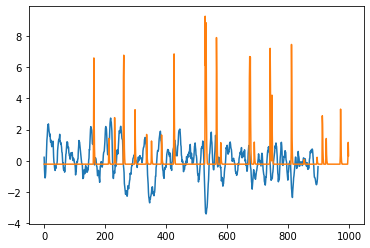

correlation between volcanic activity and component 0 at time lag = 0 is -0.16524440023375234


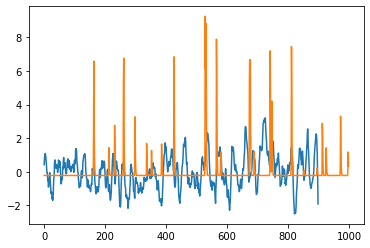

correlation between volcanic activity and component 1 at time lag = 0 is 0.07790318895185946


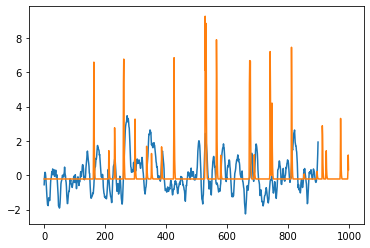

correlation between volcanic activity and component 2 at time lag = 0 is 0.09318056993974053


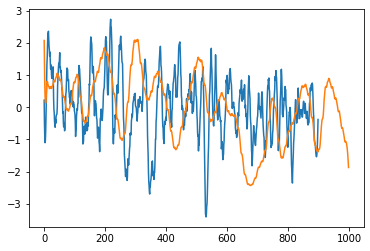

correlation between solar radiation and component 0 at time lag = 0 is 0.10194565546454981


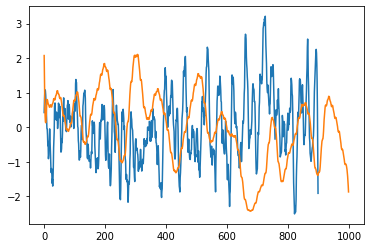

correlation between solar radiation and component 1 at time lag = 0 is -0.25306818303350326


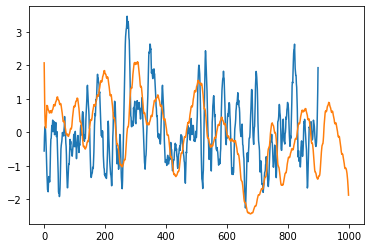

correlation between solar radiation and component 2 at time lag = 0 is 0.1100171920141778
############################
OUTPUTING RESULTS OF FastICSA
############################


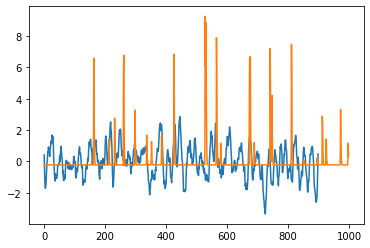

correlation between volcanic activity and component 0 at time lag = 0 is 0.027670889539783437


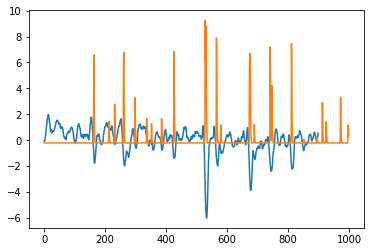

correlation between volcanic activity and component 1 at time lag = 0 is -0.4978696741426085


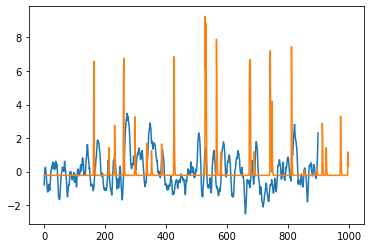

correlation between volcanic activity and component 2 at time lag = 0 is -0.029805108824942965


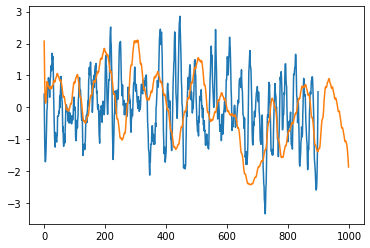

correlation between solar radiation and component 0 at time lag = 0 is 0.10811489059629711


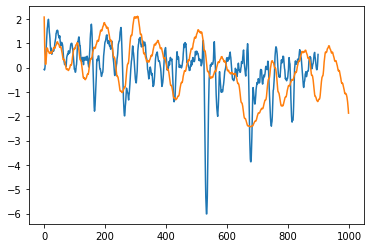

correlation between solar radiation and component 1 at time lag = 0 is 0.2895020495502777


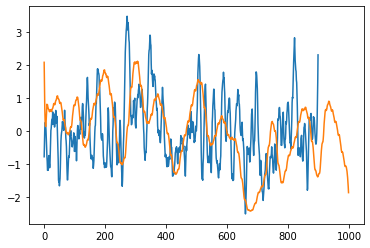

correlation between solar radiation and component 2 at time lag = 0 is 0.19724190970549052


In [9]:
plot_results("data/outputs_predict_32.npy", 3, time_lengh=899)

############################
OUTPUTING RESULTS OF PCA
############################


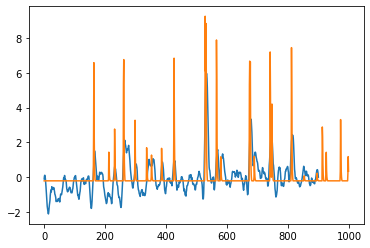

correlation between volcanic activity and component 0 at time lag = 0 is 0.46298499748901806


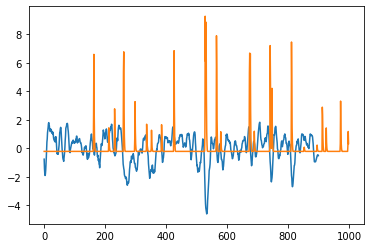

correlation between volcanic activity and component 1 at time lag = 0 is -0.2543695521303094


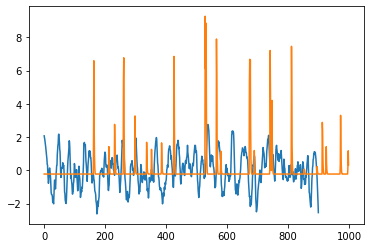

correlation between volcanic activity and component 2 at time lag = 0 is -0.01688405173483272


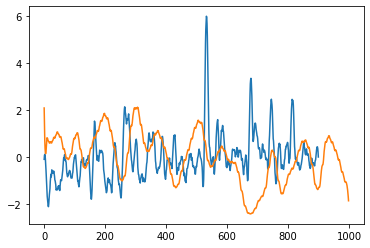

correlation between solar radiation and component 0 at time lag = 0 is -0.23568415396513426


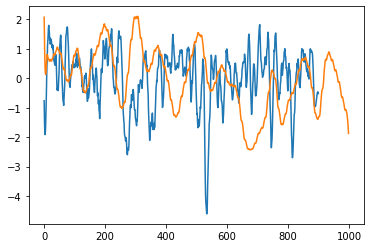

correlation between solar radiation and component 1 at time lag = 0 is -0.10454667238402854


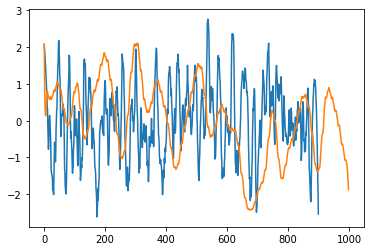

correlation between solar radiation and component 2 at time lag = 0 is -0.06926661522154727
############################
OUTPUTING RESULTS OF Varimax
############################
Get Varimax components
	 Get SVD
	 User-selected number of components: 3
	 Explaining 1.00 of variance
	 Varimax rotation
	 Further metrics


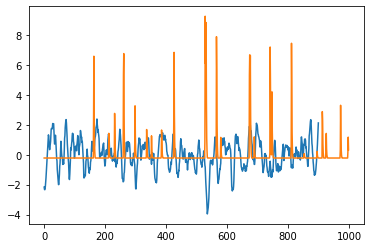

correlation between volcanic activity and component 0 at time lag = 0 is -0.07665559382143122


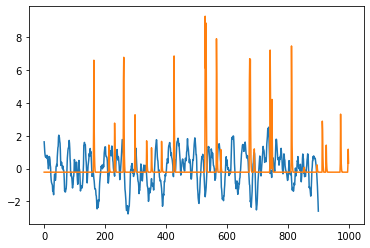

correlation between volcanic activity and component 1 at time lag = 0 is -0.12133669579645681


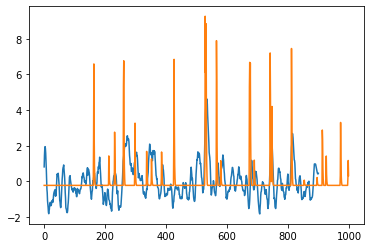

correlation between volcanic activity and component 2 at time lag = 0 is 0.253436916312155


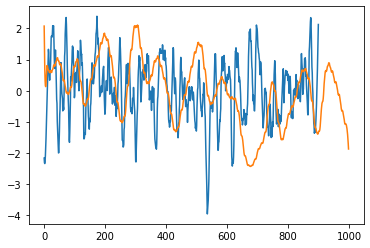

correlation between solar radiation and component 0 at time lag = 0 is 0.02575452718350472


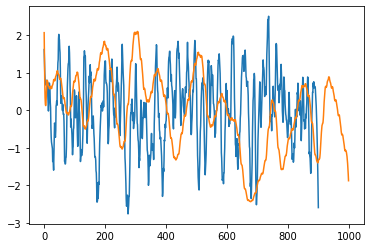

correlation between solar radiation and component 1 at time lag = 0 is -0.10770335712106274


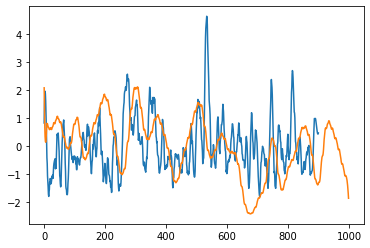

correlation between solar radiation and component 2 at time lag = 0 is 0.10277392292946311
############################
OUTPUTING RESULTS OF FastICSA
############################


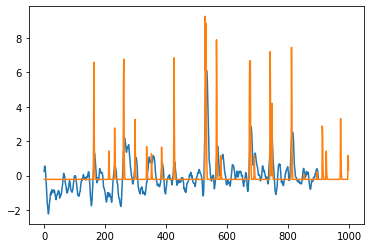

correlation between volcanic activity and component 0 at time lag = 0 is 0.44758202609128955


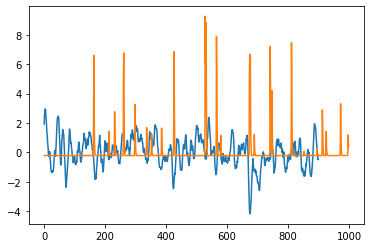

correlation between volcanic activity and component 1 at time lag = 0 is -0.1818543414246465


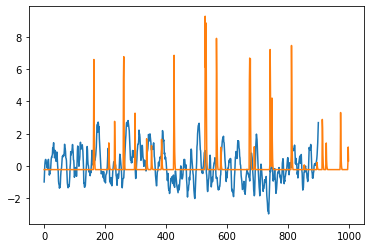

correlation between volcanic activity and component 2 at time lag = 0 is -0.02870947834209214


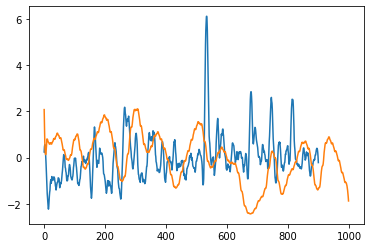

correlation between solar radiation and component 0 at time lag = 0 is -0.20259246370115583


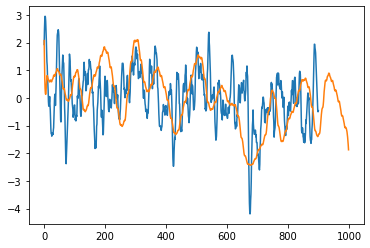

correlation between solar radiation and component 1 at time lag = 0 is 0.33348168200242323


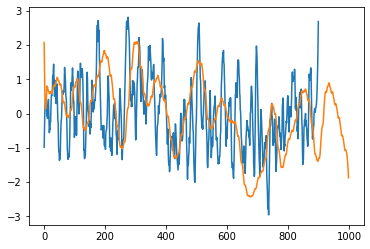

correlation between solar radiation and component 2 at time lag = 0 is 0.296481084953626


In [10]:
plot_results("data/dimension_128.npy", 3)

############################
OUTPUTING RESULTS OF PCA
############################


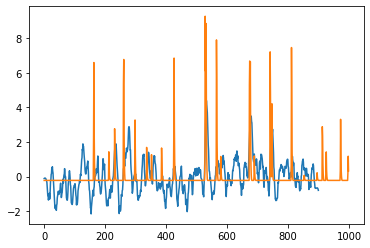

correlation between volcanic activity and component 0 at time lag = 0 is 0.29855823451481595


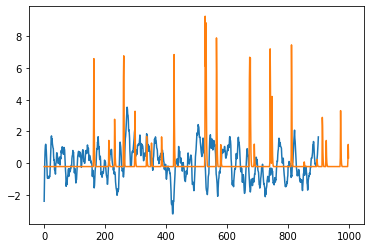

correlation between volcanic activity and component 1 at time lag = 0 is -0.17315672218551537


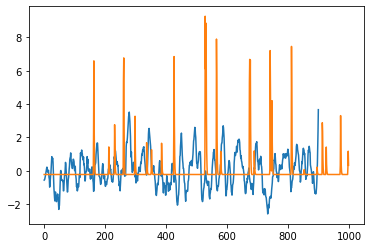

correlation between volcanic activity and component 2 at time lag = 0 is -0.11090313100850822


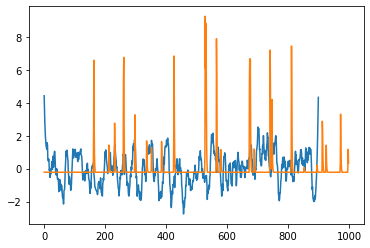

correlation between volcanic activity and component 3 at time lag = 0 is 0.016043345399333057


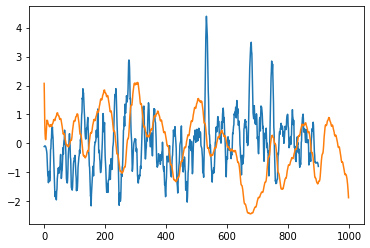

correlation between solar radiation and component 0 at time lag = 0 is -0.2444311607276274


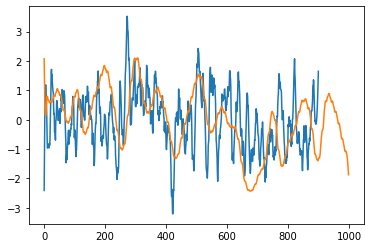

correlation between solar radiation and component 1 at time lag = 0 is 0.2715837519928896


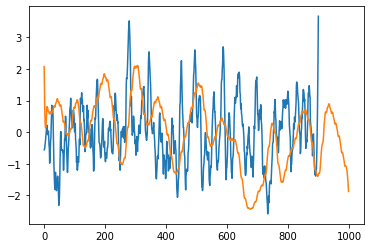

correlation between solar radiation and component 2 at time lag = 0 is 0.050650835033185945
############################
OUTPUTING RESULTS OF Varimax
############################
Get Varimax components
	 Get SVD
	 User-selected number of components: 4
	 Explaining 1.00 of variance
	 Varimax rotation
	 Further metrics


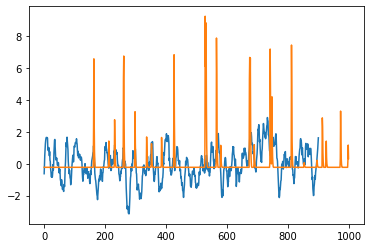

correlation between volcanic activity and component 0 at time lag = 0 is 0.11979602871540639


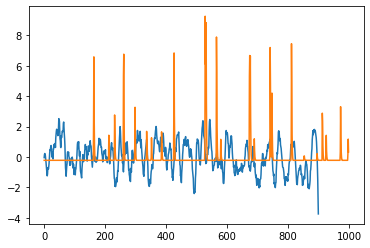

correlation between volcanic activity and component 1 at time lag = 0 is -0.017980117077102835


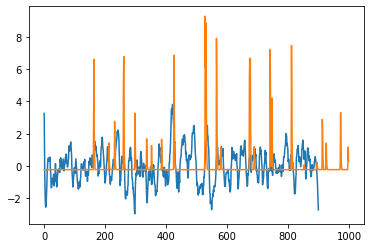

correlation between volcanic activity and component 2 at time lag = 0 is 0.09980126800747917


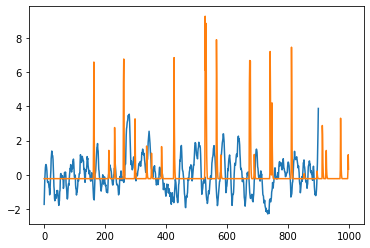

correlation between volcanic activity and component 3 at time lag = 0 is -0.16802171062237015


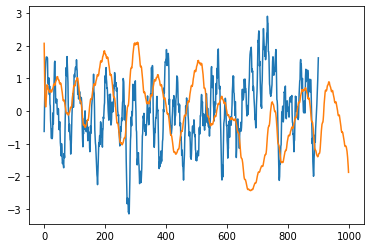

correlation between solar radiation and component 0 at time lag = 0 is -0.24353811150536286


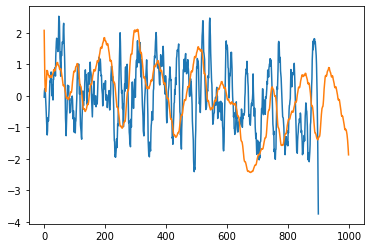

correlation between solar radiation and component 1 at time lag = 0 is 0.17503801197873264


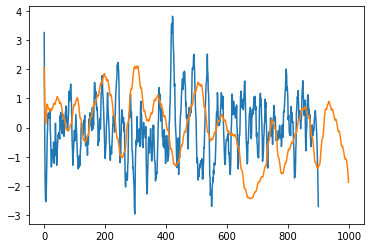

correlation between solar radiation and component 2 at time lag = 0 is -0.13106048420517064
############################
OUTPUTING RESULTS OF FastICSA
############################


/home/tiba_xa/anaconda3/envs/challenge/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


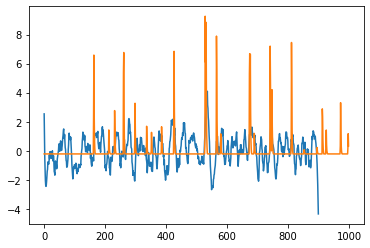

correlation between volcanic activity and component 0 at time lag = 0 is 0.20582743246816254


correlation between volcanic activity and component 1 at time lag = 0 is -0.17765188118775152


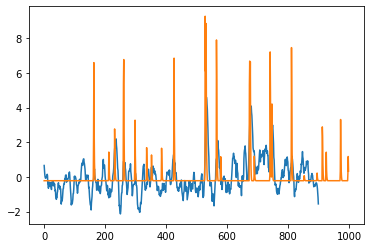

correlation between volcanic activity and component 2 at time lag = 0 is 0.3673231575462289


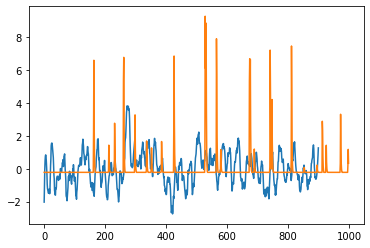

correlation between volcanic activity and component 3 at time lag = 0 is 0.010647694866279653


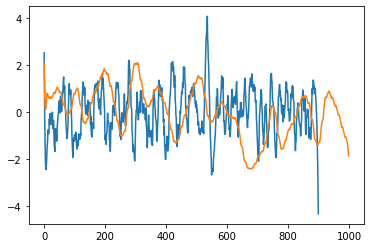

correlation between solar radiation and component 0 at time lag = 0 is -0.10953876577398014


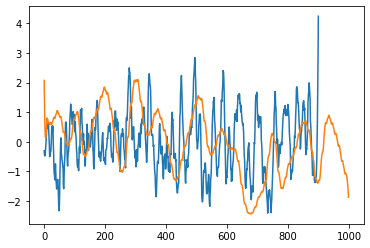

correlation between solar radiation and component 1 at time lag = 0 is 0.06860363234412603


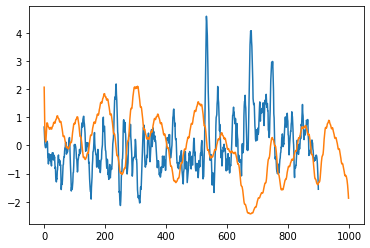

correlation between solar radiation and component 2 at time lag = 0 is -0.3723839004799752


In [56]:
plot_results("data/vae_sigma_4.npy", 4)

############################
OUTPUTING RESULTS OF PCA
############################


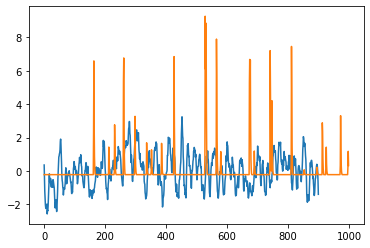

correlation between volcanic activity and component 0 at time lag = 0 is -0.04181831889340675


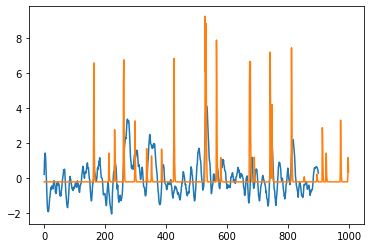

correlation between volcanic activity and component 1 at time lag = 0 is 0.22342306150092409


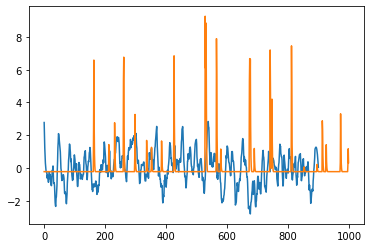

correlation between volcanic activity and component 2 at time lag = 0 is -0.04915290300079038


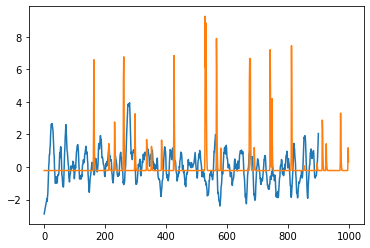

correlation between volcanic activity and component 3 at time lag = 0 is -0.05874839152264798


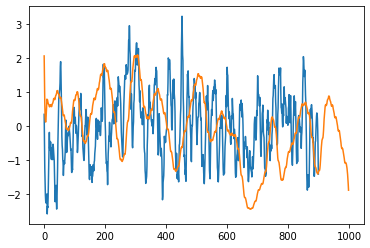

correlation between solar radiation and component 0 at time lag = 0 is 0.0855805437734583


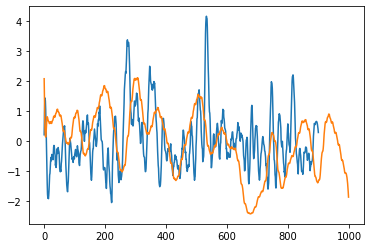

correlation between solar radiation and component 1 at time lag = 0 is 0.09591921071649634


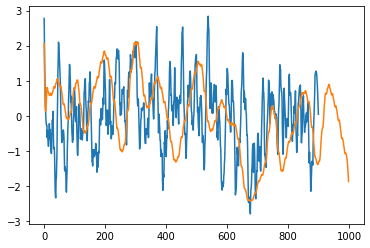

correlation between solar radiation and component 2 at time lag = 0 is 0.16143871316174419
############################
OUTPUTING RESULTS OF Varimax
############################
Get Varimax components
	 Get SVD
	 User-selected number of components: 4
	 Explaining 1.00 of variance
	 Varimax rotation
	 Further metrics


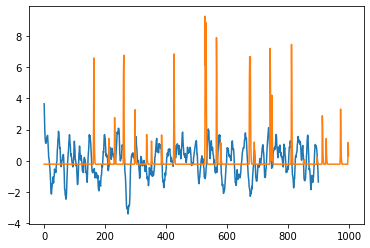

correlation between volcanic activity and component 0 at time lag = 0 is -0.08927955558735966


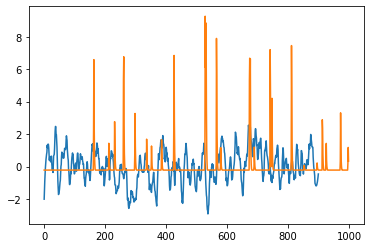

correlation between volcanic activity and component 1 at time lag = 0 is 0.003839090844961464


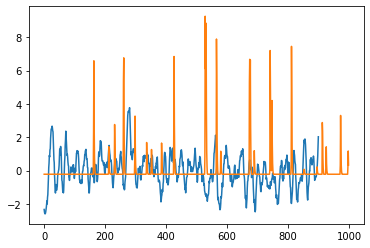

correlation between volcanic activity and component 2 at time lag = 0 is -0.10025260437477718


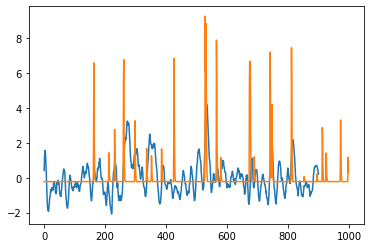

correlation between volcanic activity and component 3 at time lag = 0 is 0.2234655245674616


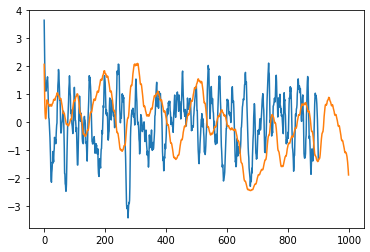

correlation between solar radiation and component 0 at time lag = 0 is -0.013254120235210972


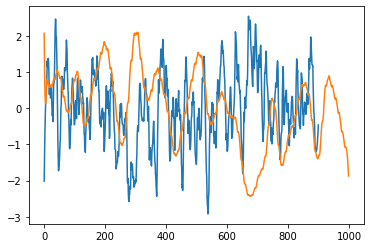

correlation between solar radiation and component 1 at time lag = 0 is -0.1929141861468947


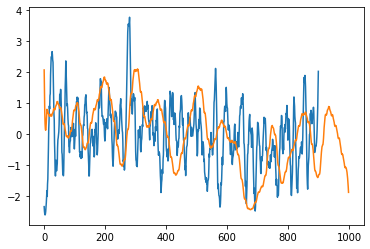

correlation between solar radiation and component 2 at time lag = 0 is 0.15114926164677783
############################
OUTPUTING RESULTS OF FastICSA
############################


/home/tiba_xa/anaconda3/envs/challenge/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


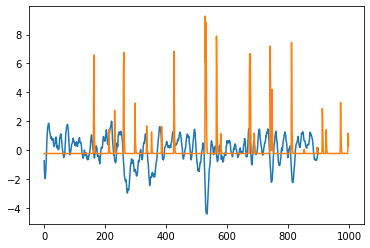

correlation between volcanic activity and component 0 at time lag = 0 is -0.2351812014710076


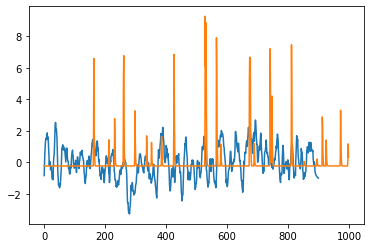

correlation between volcanic activity and component 1 at time lag = 0 is 0.0719035230290656


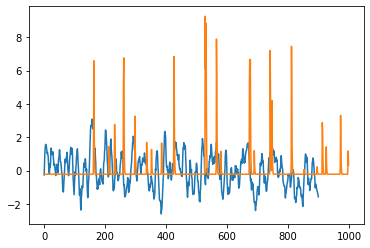

correlation between volcanic activity and component 2 at time lag = 0 is 0.049863625310269846


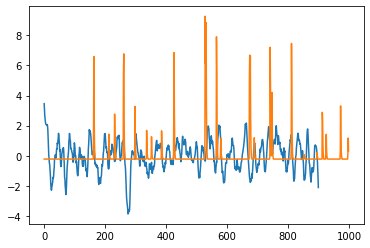

correlation between volcanic activity and component 3 at time lag = 0 is -0.007740858703090225


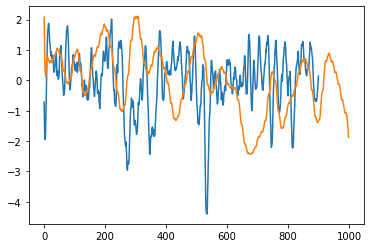

correlation between solar radiation and component 0 at time lag = 0 is -0.09996128338801565


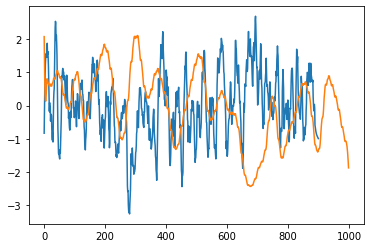

correlation between solar radiation and component 1 at time lag = 0 is -0.19879647284281748


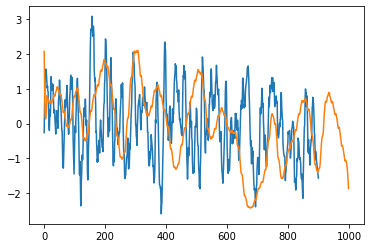

correlation between solar radiation and component 2 at time lag = 0 is 0.10491483592512887


In [57]:
plot_results("data/vae_mu_16.npy", 4)

############################
OUTPUTING RESULTS OF PCA
############################


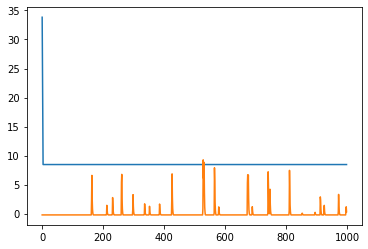

correlation between volcanic activity and component 0 at time lag = 0 is -0.011192916618121268


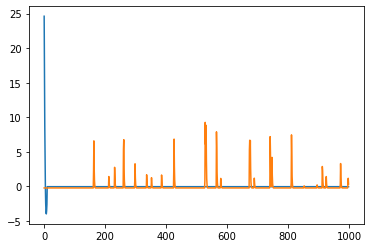

correlation between volcanic activity and component 1 at time lag = 0 is -0.00808325314818639


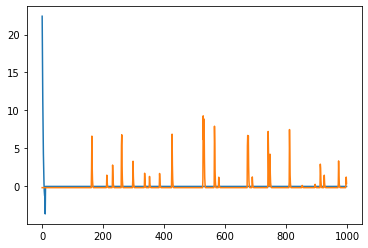

correlation between volcanic activity and component 2 at time lag = 0 is -0.01272462239429141


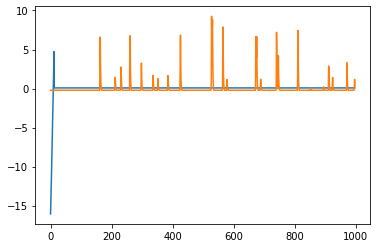

correlation between volcanic activity and component 3 at time lag = 0 is 0.017402370986353975


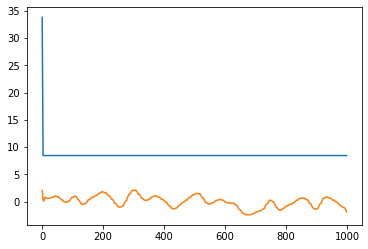

correlation between solar radiation and component 0 at time lag = 0 is 0.07991528109899537


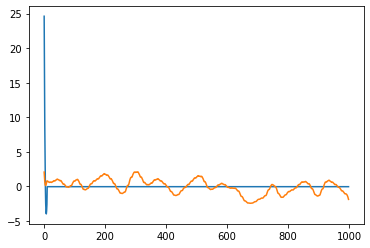

correlation between solar radiation and component 1 at time lag = 0 is 0.07174585840964387


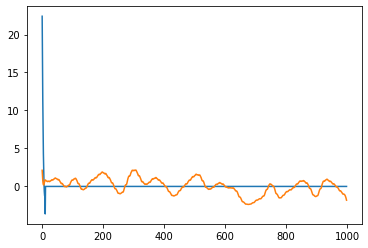

correlation between solar radiation and component 2 at time lag = 0 is 0.07401999553754167
############################
OUTPUTING RESULTS OF Varimax
############################
Get Varimax components
	 Get SVD
	 User-selected number of components: 4
	 Explaining 1.00 of variance
	 Varimax rotation
	 Further metrics


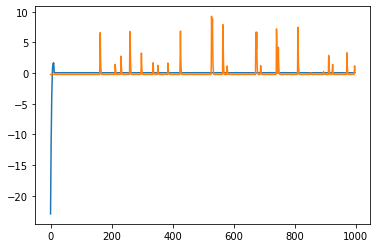

correlation between volcanic activity and component 0 at time lag = 0 is 0.012395256305107266


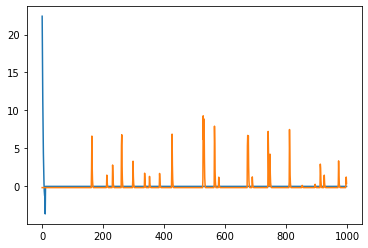

correlation between volcanic activity and component 1 at time lag = 0 is -0.012730270015653038


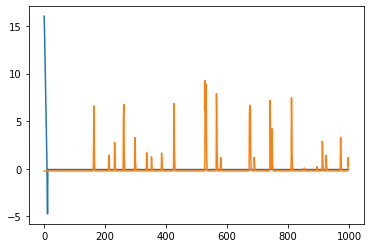

correlation between volcanic activity and component 2 at time lag = 0 is -0.01741407857169116


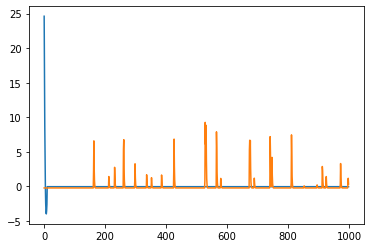

correlation between volcanic activity and component 3 at time lag = 0 is -0.00808325354757969


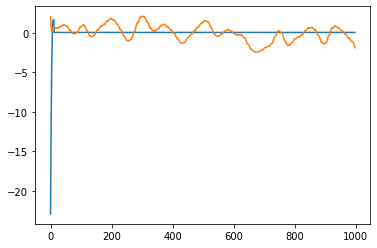

correlation between solar radiation and component 0 at time lag = 0 is -0.07491050101245135


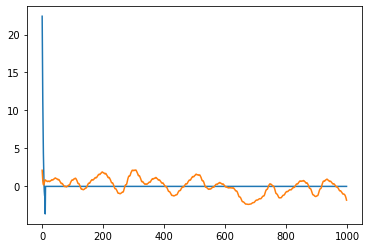

correlation between solar radiation and component 1 at time lag = 0 is 0.07401723430871494


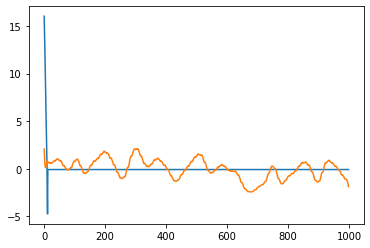

correlation between solar radiation and component 2 at time lag = 0 is 0.06711335978700549
############################
OUTPUTING RESULTS OF FastICSA
############################


/home/tiba_xa/anaconda3/envs/challenge/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:59: RuntimeWarning: invalid value encountered in sqrt
  return np.dot(np.dot(u * (1. / np.sqrt(s)), u.T), W)


ValueError: array must not contain infs or NaNs

In [5]:
plot_results("data/b_vae_mu_4.npy", 4, time_lengh=999)

############################
OUTPUTING RESULTS OF PCA
############################


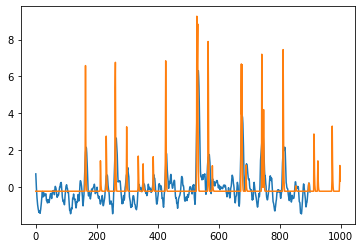

correlation between volcanic activity and component 0 at time lag = 0 is 0.5504655111668489


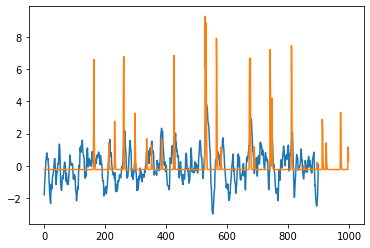

correlation between volcanic activity and component 1 at time lag = 0 is 0.28383699867431506


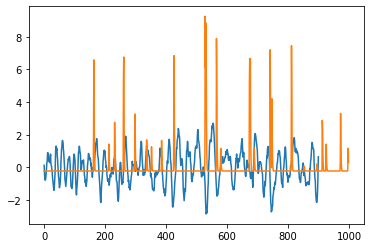

correlation between volcanic activity and component 2 at time lag = 0 is -0.1876931444305421


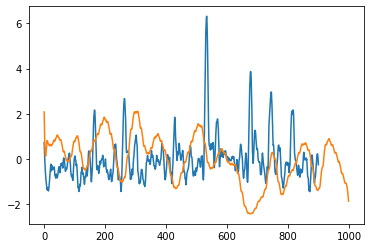

correlation between solar radiation and component 0 at time lag = 0 is -0.17389754288629483


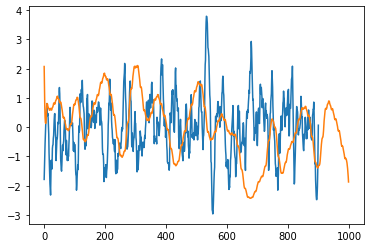

correlation between solar radiation and component 1 at time lag = 0 is -0.13116026839697878


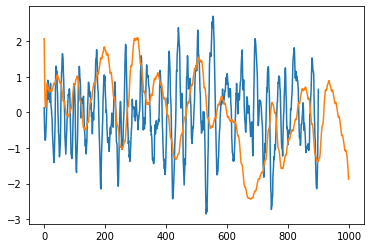

correlation between solar radiation and component 2 at time lag = 0 is -0.05021559572414574
############################
OUTPUTING RESULTS OF Varimax
############################
Get Varimax components
	 Get SVD
	 User-selected number of components: 3
	 Explaining 1.00 of variance
	 Varimax rotation
	 Further metrics


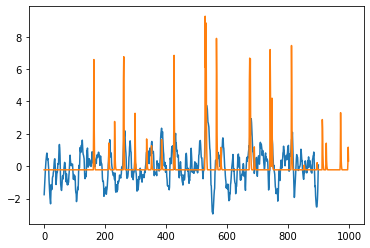

correlation between volcanic activity and component 0 at time lag = 0 is 0.2818453965523496


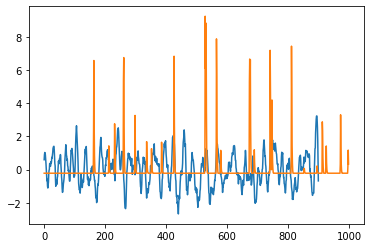

correlation between volcanic activity and component 1 at time lag = 0 is 0.062397792804501355


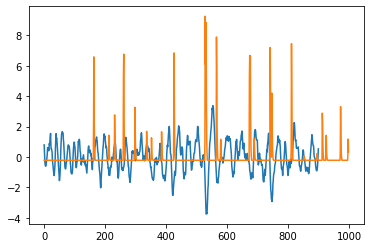

correlation between volcanic activity and component 2 at time lag = 0 is -0.2643704052892694


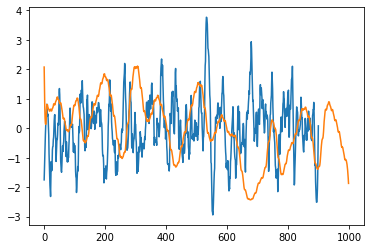

correlation between solar radiation and component 0 at time lag = 0 is -0.13196621113041054


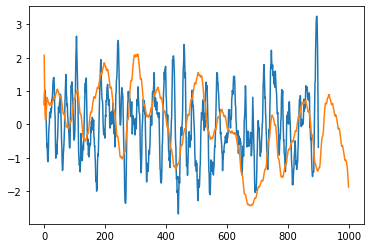

correlation between solar radiation and component 1 at time lag = 0 is 0.1083003570517566


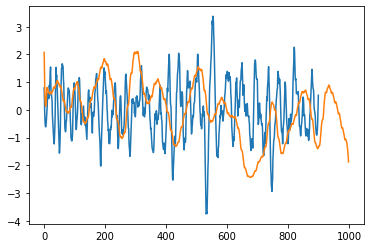

correlation between solar radiation and component 2 at time lag = 0 is 0.0056602670632954445
############################
OUTPUTING RESULTS OF FastICSA
############################


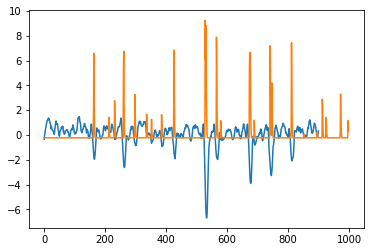

correlation between volcanic activity and component 0 at time lag = 0 is -0.5677544556762406


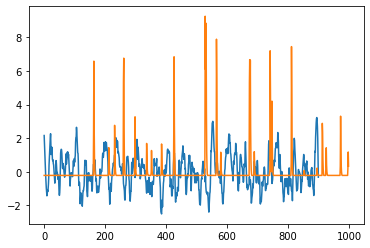

correlation between volcanic activity and component 1 at time lag = 0 is -0.06654653116117629


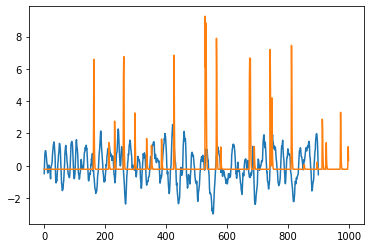

correlation between volcanic activity and component 2 at time lag = 0 is 0.02082314870819782


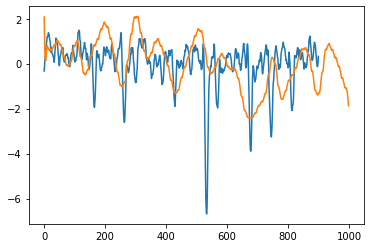

correlation between solar radiation and component 0 at time lag = 0 is 0.16857009594983186


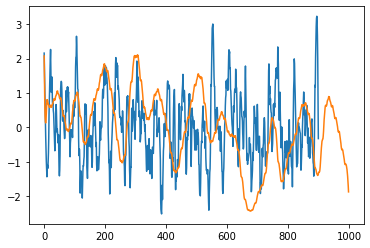

correlation between solar radiation and component 1 at time lag = 0 is 0.08589862775520798


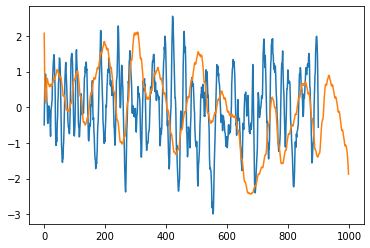

correlation between solar radiation and component 2 at time lag = 0 is 0.09575459889224573


In [58]:
plot_results("data/eq_dimension_32.npy", 3)

############################
OUTPUTING RESULTS OF PCA
############################


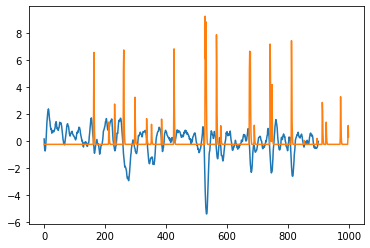

correlation between volcanic activity and component 0 at time lag = 0 is -0.357122302681549


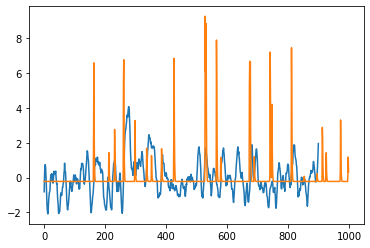

correlation between volcanic activity and component 1 at time lag = 0 is 0.052192266679072404


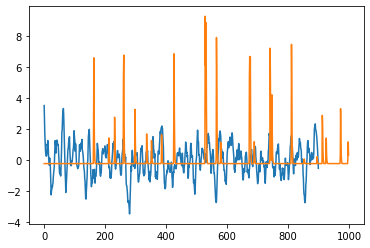

correlation between volcanic activity and component 2 at time lag = 0 is 0.02084334355260636


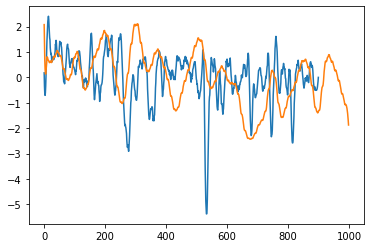

correlation between solar radiation and component 0 at time lag = 0 is 0.11520314410189592


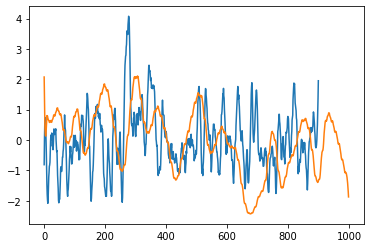

correlation between solar radiation and component 1 at time lag = 0 is 0.05288866948339803


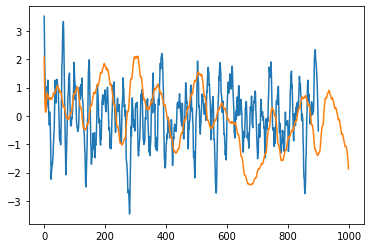

correlation between solar radiation and component 2 at time lag = 0 is 0.048828245160988645
############################
OUTPUTING RESULTS OF Varimax
############################
Get Varimax components
	 Get SVD
	 User-selected number of components: 3
	 Explaining 1.00 of variance
	 Varimax rotation
	 Further metrics


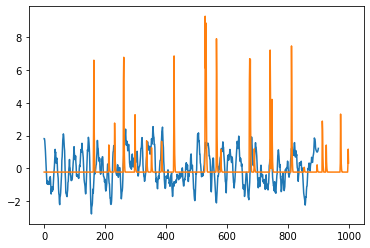

correlation between volcanic activity and component 0 at time lag = 0 is 0.05649871641625015


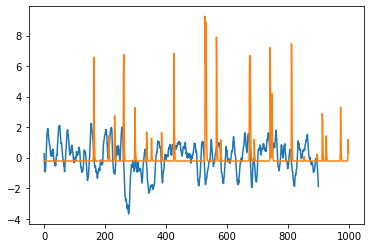

correlation between volcanic activity and component 1 at time lag = 0 is -0.05652935131075555


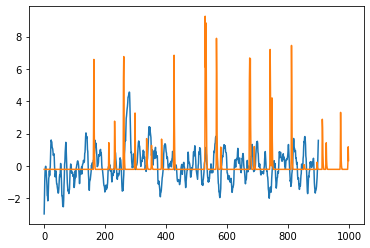

correlation between volcanic activity and component 2 at time lag = 0 is 0.017054570688851568


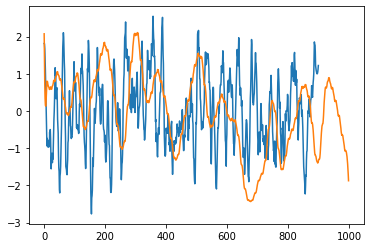

correlation between solar radiation and component 0 at time lag = 0 is 0.07801378140875477


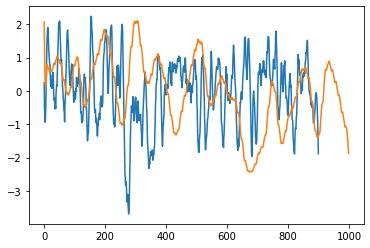

correlation between solar radiation and component 1 at time lag = 0 is -0.06116943894929048


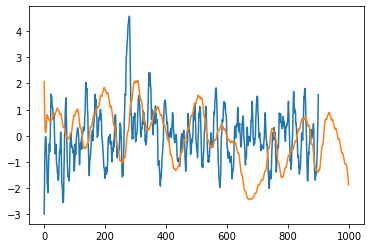

correlation between solar radiation and component 2 at time lag = 0 is -0.001891454659094724
############################
OUTPUTING RESULTS OF FastICSA
############################


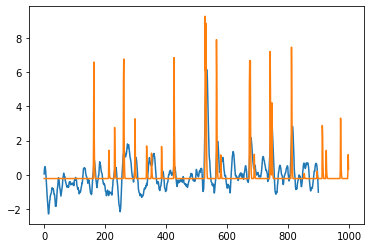

correlation between volcanic activity and component 0 at time lag = 0 is 0.4219027345825665


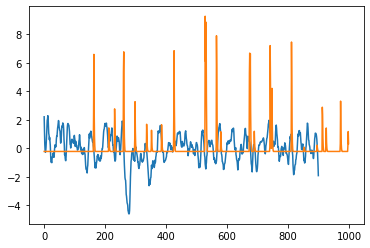

correlation between volcanic activity and component 1 at time lag = 0 is -0.0329082296797679


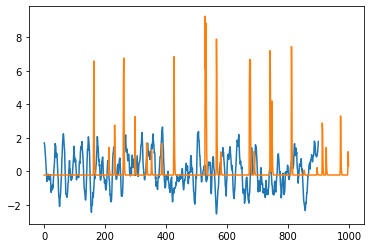

correlation between volcanic activity and component 2 at time lag = 0 is -0.06981777149815503


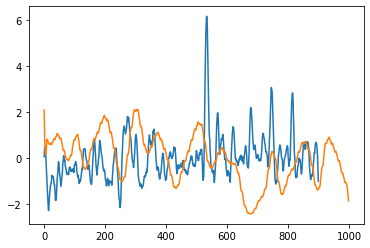

correlation between solar radiation and component 0 at time lag = 0 is -0.17818654952200758


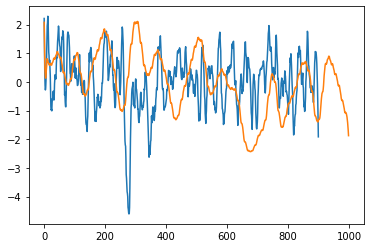

correlation between solar radiation and component 1 at time lag = 0 is -0.026816993460903354


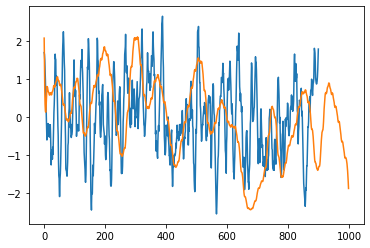

correlation between solar radiation and component 2 at time lag = 0 is 0.14832146715236788


In [15]:
plot_results("data/np_dimension_32.npy", 3)

############################
OUTPUTING RESULTS OF PCA
############################


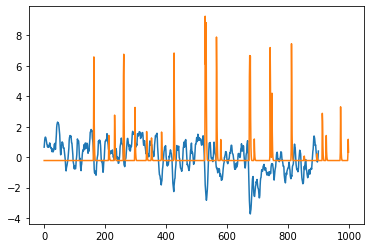

correlation between volcanic activity and component 0 at time lag = 0 is -0.2913270344048807


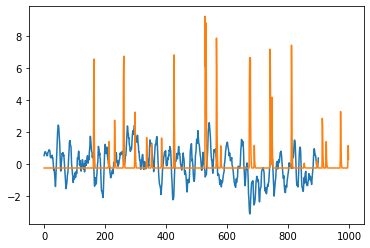

correlation between volcanic activity and component 1 at time lag = 0 is -0.11752148145951932


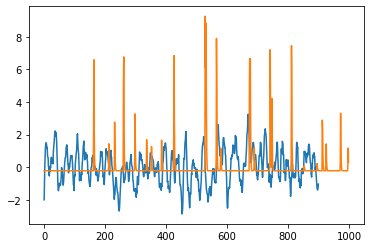

correlation between volcanic activity and component 2 at time lag = 0 is -0.05074198537245021


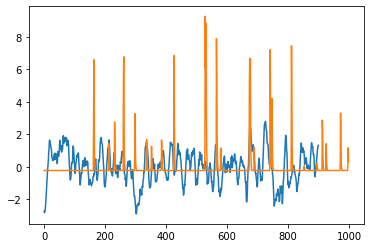

correlation between volcanic activity and component 3 at time lag = 0 is 0.07238066509036832


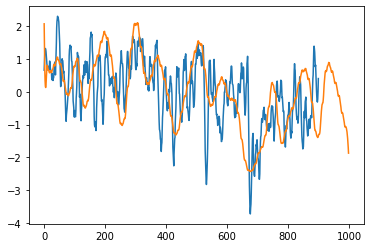

correlation between solar radiation and component 0 at time lag = 0 is 0.47974672230439924


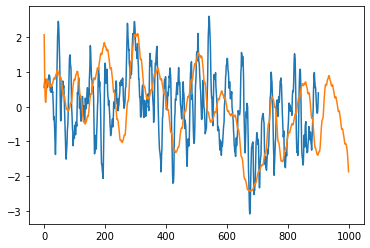

correlation between solar radiation and component 1 at time lag = 0 is 0.3319281040926288


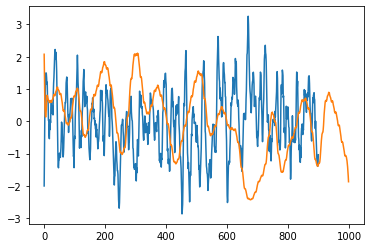

correlation between solar radiation and component 2 at time lag = 0 is -0.13298419256272423
############################
OUTPUTING RESULTS OF Varimax
############################
Get Varimax components
	 Get SVD
	 User-selected number of components: 4
	 Explaining 1.00 of variance
	 Varimax rotation
	 Further metrics


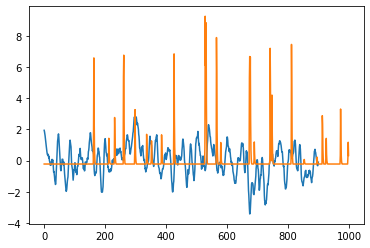

correlation between volcanic activity and component 0 at time lag = 0 is -0.10520395758860755


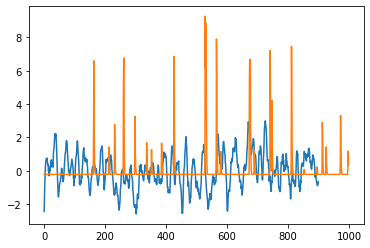

correlation between volcanic activity and component 1 at time lag = 0 is -0.0015628506334255977


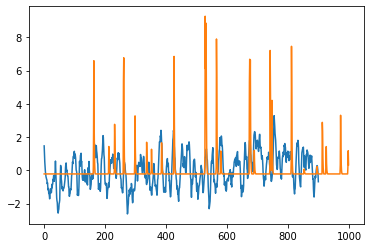

correlation between volcanic activity and component 2 at time lag = 0 is 0.1110521457938651


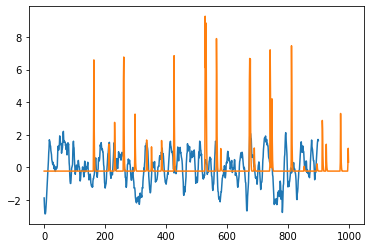

correlation between volcanic activity and component 3 at time lag = 0 is 0.09110683979286312


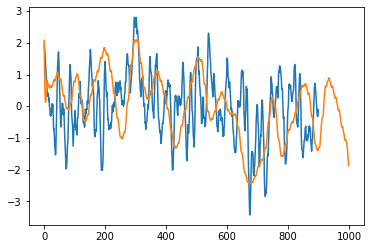

correlation between solar radiation and component 0 at time lag = 0 is 0.3090631921343474


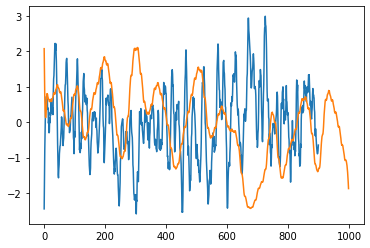

correlation between solar radiation and component 1 at time lag = 0 is -0.20753112472908694


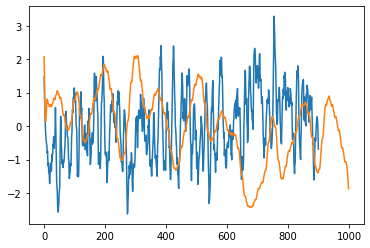

correlation between solar radiation and component 2 at time lag = 0 is -0.25495190281668023
############################
OUTPUTING RESULTS OF FastICSA
############################


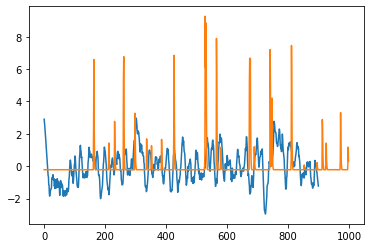

correlation between volcanic activity and component 0 at time lag = 0 is 0.003144098204357387


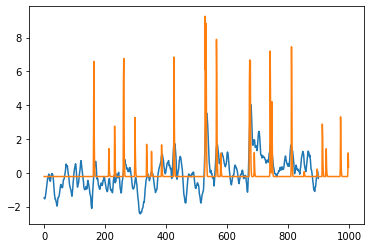

correlation between volcanic activity and component 1 at time lag = 0 is 0.3445223452473186


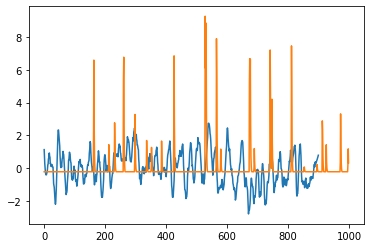

correlation between volcanic activity and component 2 at time lag = 0 is -0.010530256573577626


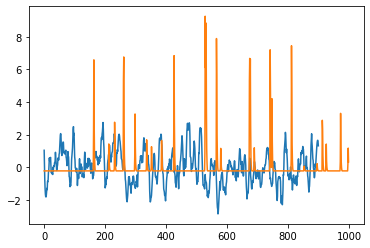

correlation between volcanic activity and component 3 at time lag = 0 is -0.07639188056696708


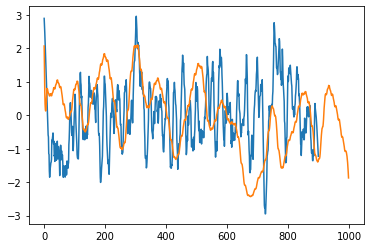

correlation between solar radiation and component 0 at time lag = 0 is 0.02255957598856599


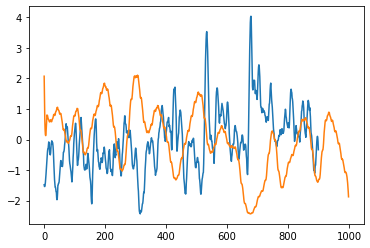

correlation between solar radiation and component 1 at time lag = 0 is -0.49313220445448863


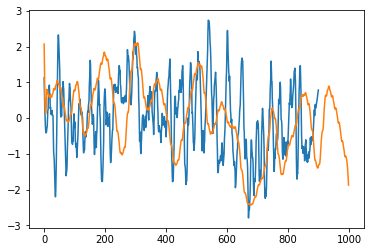

correlation between solar radiation and component 2 at time lag = 0 is 0.23843228593787266


In [36]:
model = plot_results("data/sp_dimension_32.npy", 4, return_model = "FastICA")

In [37]:
ae_output = np.load("data/sp_dimension_32.npy")
dm = dmMethod(ae_output, n_components=4)

In [38]:
dm.perform_fastICA()

In [45]:
dm.components = dm.components.transpose()

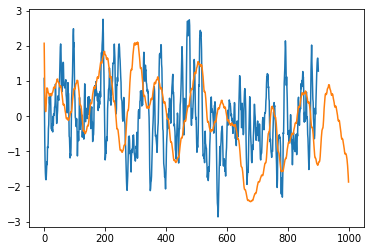

correlation between solar radiation and component 0 at time lag = 0 is -0.13734261488158844


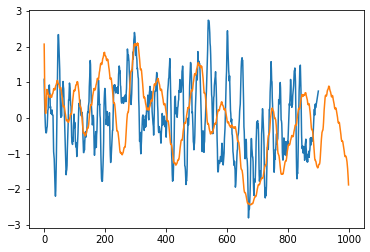

correlation between solar radiation and component 1 at time lag = 0 is -0.2374144099468433


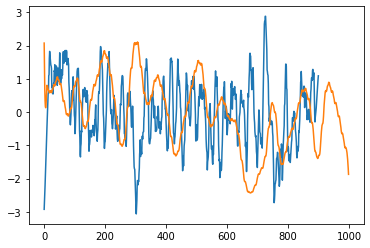

correlation between solar radiation and component 2 at time lag = 0 is 0.024083311651618363


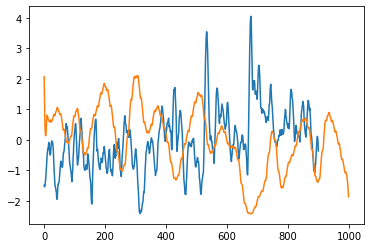

correlation between solar radiation and component 3 at time lag = 0 is 0.49278073754303847


In [64]:
time_lengh = 900
for i in range(4):
    plt.plot(-dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(solar_forcing_sm[:]))
    plt.show()
    print("correlation between solar radiation and component {} at time lag = 0 is {}". format(i, 
          np.corrcoef(solar_forcing_sm[:time_lengh], savgol_filter(dm.components[i, :], 19, 3))[0,1]))

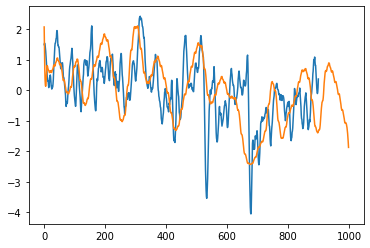

In [67]:
    plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[3, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(solar_forcing_sm[:]))